In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
import scipy.stats
from scipy import stats
from scipy.stats import uniform
from scipy.stats import cauchy
from math import log

In [4]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m
rng.current = 1

1: Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

In [5]:
random = [rng() for i in range(1000)]
numbers = np.arange(0,10)
numbersSort = np.arange(0,10)

arr1 = np.zeros(10)
arr2 = np.zeros(10)

weight = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
weight = weight / weight.sum()

print(weight)
print(weight.sum())

[0.05973121 0.14932802 0.08312593 0.11946242 0.15430562 0.26879044
 0.05525137 0.0099552  0.00049776 0.09955202]
1.0


In [6]:
numbersSort = weight.argsort()[::-1]
weightSort = np.sort(weight)[::-1]

print(weightSort)
print(numbersSort)

[0.26879044 0.15430562 0.14932802 0.11946242 0.09955202 0.08312593
 0.05973121 0.05525137 0.0099552  0.00049776]
[5 4 1 3 9 2 0 6 7 8]


In [7]:
for i in range (1, 10):
    weight[i] += weight[i - 1]

for i in range (1, 10):
    weightSort[i] += weightSort[i - 1]

Сначала для неупорядоченных весов:

In [8]:
t1 = time.time()

for i in range(1000):
    for j in range (10):
        if ((j == 0 and random[i] < weight[j]) or (j != 0 and random[i] < weight[j] and random[i] >= weight[j - 1])):
            arr1[j] += 1
            break

t2 = time.time()

print(t2 - t1) 
print(arr1)

0.004986286163330078
[ 49. 163.  75. 119. 154. 271.  59.  10.   2.  98.]


Теперь для упорядоченных:

In [9]:
t1 = time.time()

for i in range(1000):
    for j in range (10):
        if ((j == 0 and random[i] < weightSort[j]) or (j != 0 and random[i] < weightSort[j] and random[i] >= weightSort[j - 1])):
            arr2[j] += 1
            break

t2 = time.time()

print(t2 - t1) 
print(arr2)

0.00600123405456543
[268. 152. 145. 106. 105.  90.  68.  56.  10.   0.]


Видим, что второй алгоритм (с упорядоченными весами) работает быстрее

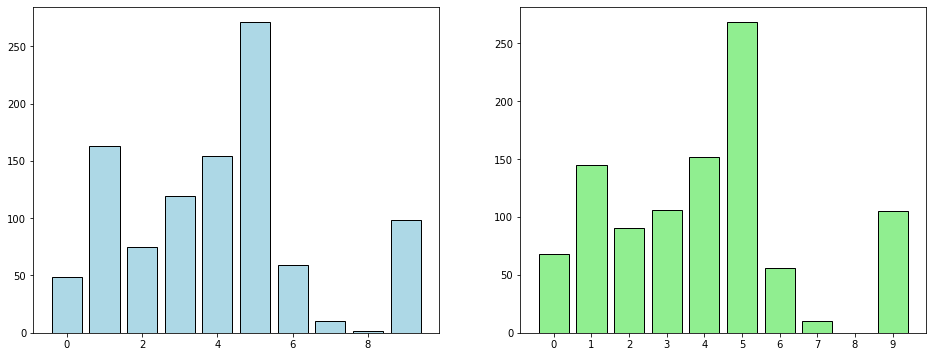

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (16, 6))

ax1.bar(numbers, arr1, color='lightblue', edgecolor = 'black')
plt.xticks(range(10))

ax2.bar(numbersSort, arr2, color='lightgreen', edgecolor = 'black')
plt.xticks(range(10))
plt.show()

2: Смоделируйте выборку размера 1000 из распределения  Exp(λ). Постройте выборочную гистограмму и точный график плотности распределения

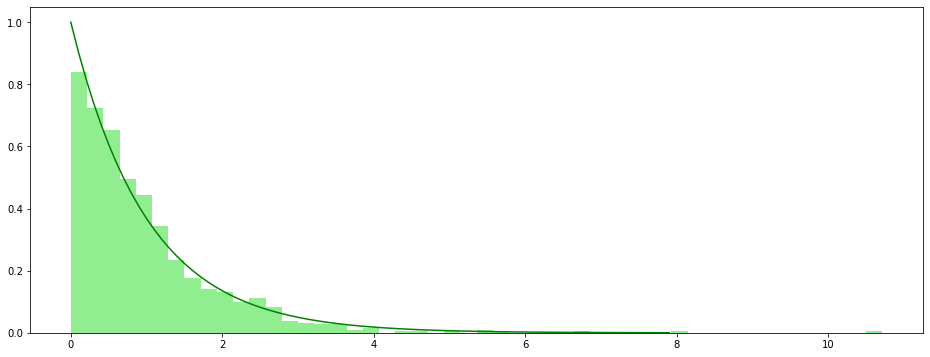

In [11]:
def Ln_P(x, y):
    return -log(1 - x) / y

random = [rng() for i in range(1000)]
random = [Ln_P(random[i], 1) for i in range(1000)]
r = np.arange(0, 8, .1)

plt.figure(figsize = (16, 6))
plt.hist(random, density=True, bins = 50, color = 'lightgreen')
plt.plot(r, scipy.stats.expon.pdf(r, scale=1),color = 'green')
plt.show()

3: Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

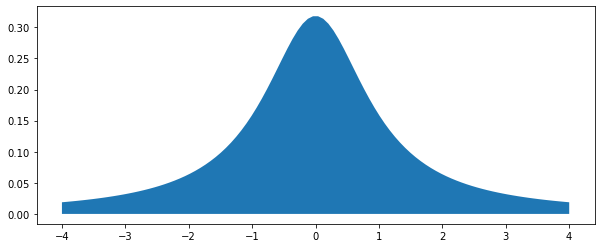

In [12]:
dist = stats.cauchy()
x = np.linspace(-4, 4, 100)
plt.figure(figsize = (10, 4))
plt.fill_between(x, 0, dist.pdf(x))
plt.show()

In [13]:
import random

x = np.linspace(-4, 4, 1000)
Ravnom = uniform(-4, 8)

X_sample = np.array([random.uniform(-4, 4) for i in range (1000)])
Y_sample = np.array([random.uniform(0, 0.5) for i in range (1000)])

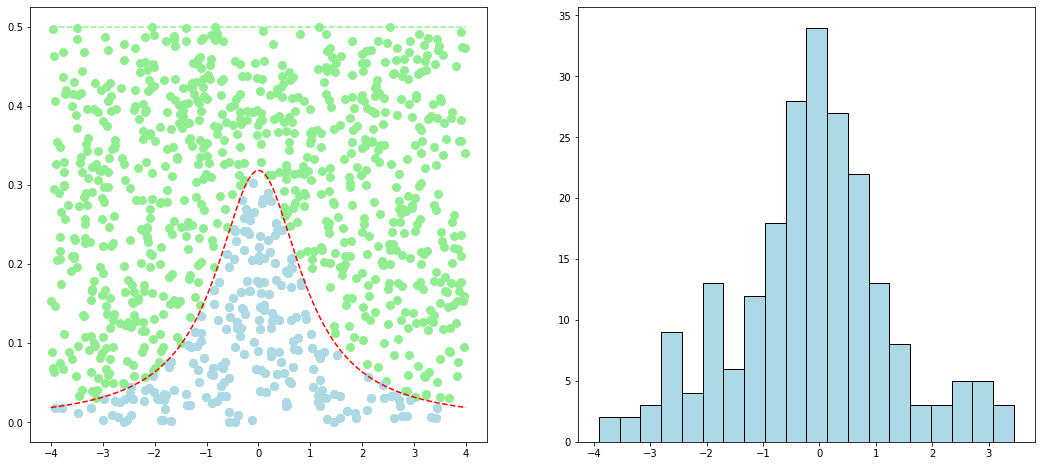

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (18, 8))

ax1.plot(x, 4 * Ravnom.pdf(x), 'r--', color = 'lightgreen')
ax1.plot(x, cauchy.pdf(x), 'r--')
ax1.scatter(X_sample, Y_sample, color = 'lightgreen', lw = 3)

Cauchy = np.where(Y_sample <= cauchy.pdf(X_sample))

ax1.scatter(X_sample[Cauchy], Y_sample[Cauchy], color = 'lightblue', lw =3)
ax2.hist(X_sample[Cauchy], bins = 20, color = 'lightblue', edgecolor = 'black')

plt.show()

4: Смоделировать выборку из 500 точек равномерно распределенных внутри данного треугольника без использования метода отбора.

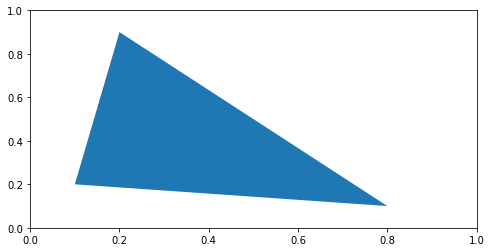

In [15]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection


polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.figure(figsize = (8, 4))
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

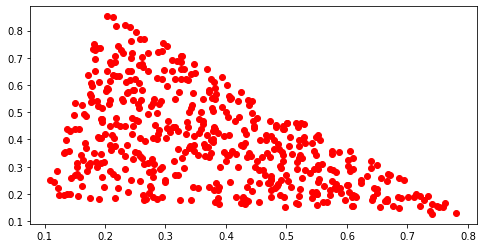

In [16]:
x = np.array([rng() for i in range(500)])
y = np.array([rng() for i in range(500)])

x[(x + y) > 1] = 1 - x[(x + y) > 1]
y[(x + y) > 1] = 1 - y[(x + y) > 1] 

x =  0.7 * x + 0.1 * y + 0.1
y = -0.1 * x + 0.7 * y + 0.2

plt.figure(figsize = (8, 4))
plt.scatter(x, y, color='red')
plt.show()

5: Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

In [17]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
A = np.array([rng() * 2 * np.pi for i in range(500)])
R = [rng() * 2 * np.pi for i in range(500)]

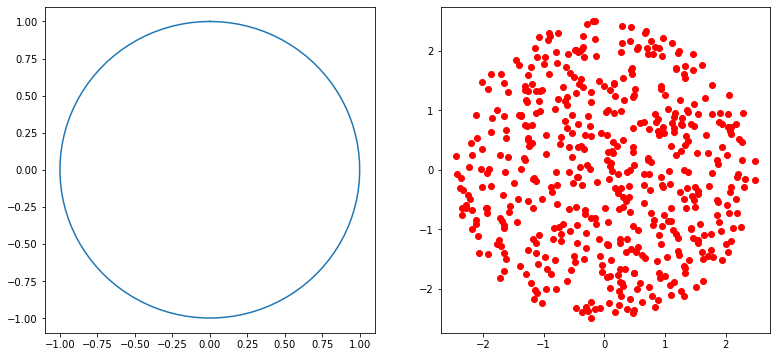

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (13, 6))
ax1.plot(np.sin(t), np.cos(t))
ax2.scatter(np.sqrt(R) * np.cos(A), np.sqrt(R) * np.sin(A), color='red')

plt.show()

6: Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

In [29]:
def walking():
    x = np.array([(rng() - 0.5) * 2 for i in range(500)]) 
    y = np.where(x > 0)
    y = y[0][0:50]
    z = np.where(x < 0)
    z = z[0][0:50]

    A = np.zeros(120)
    A[y] += 1

    B = np.zeros(120)
    B[z] += 1

    EL = A[(A != 0) | (B != 0)]
    EM = B[(A != 0) | (B != 0)]

    return np.cumsum(EL - EM)

In [30]:
x_1 = walking()
x_2 = walking()

x_1 = (x_1 + x_2) / 2 
x_2 = (x_1 - x_2) / 2

y_1 = walking()
y_2 = walking()

y_1 = (y_1 + y_2) / 2 
y_2 = (y_1 - y_2) / 2

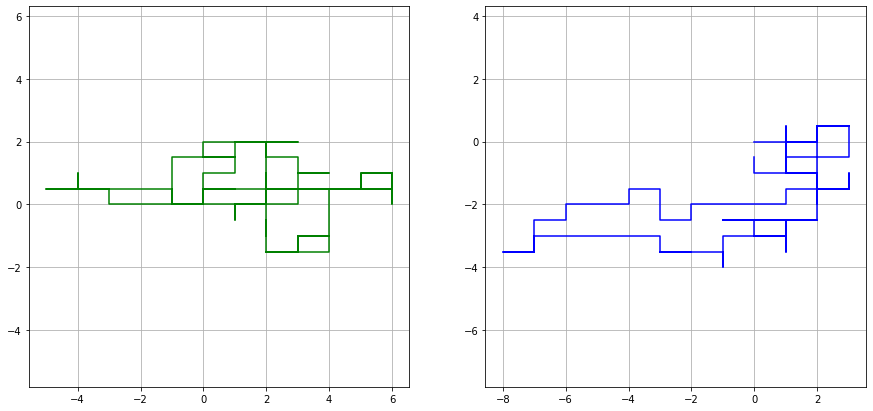

In [31]:
fig, sub = plt.subplots(1, 2, figsize=(15, 7))
sub[0].plot(x_1, x_2, color = 'green')
sub[1].plot(y_1, y_2, color = 'blue')

sub[0].axis('equal')
sub[1].axis('equal')

grid = sub[0].grid(True)
grid = sub[1].grid(True)

plt.show()

7: Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модифицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

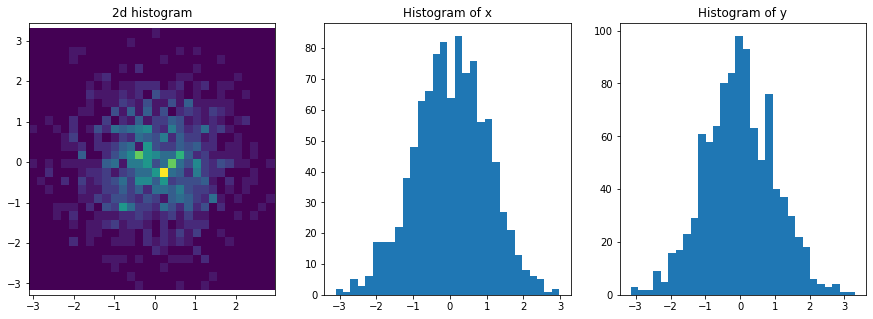

In [33]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

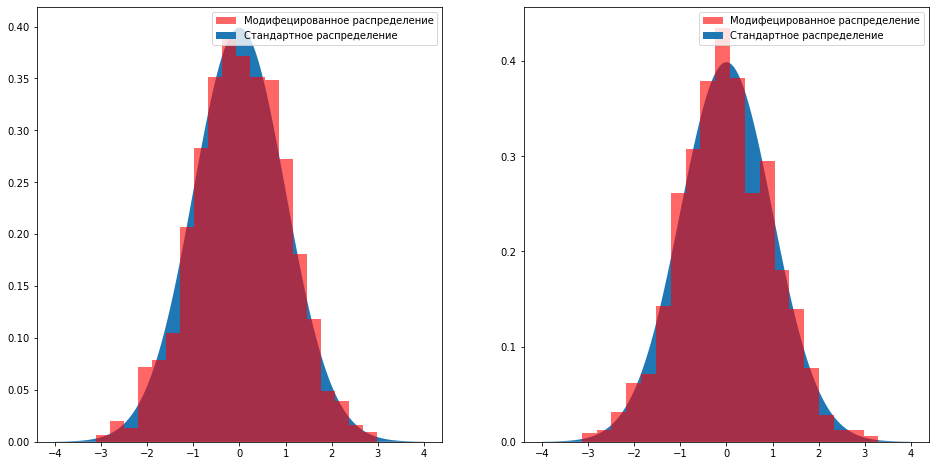

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

ax[0].hist(x, bins = 20, density=True, alpha = 0.6, color = 'r', label = 'Модифецированное распределение')
ax[1].hist(y, bins = 20, density=True, alpha = 0.6, color = 'r', label = 'Модифецированное распределение')

dist = stats.norm()

L = np.linspace(-4, 4, 1000)

ax[0].fill_between(L, 0, dist.pdf(L), label = 'Стандартное распределение')
ax[1].fill_between(L, 0, dist.pdf(L), label = 'Стандартное распределение')
ax[0].legend()
ax[1].legend()
plt.show()

Отчетливо видим график нормального распределения с параметрами 0, 1 на обоих картинках

Посмотрим на выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4))

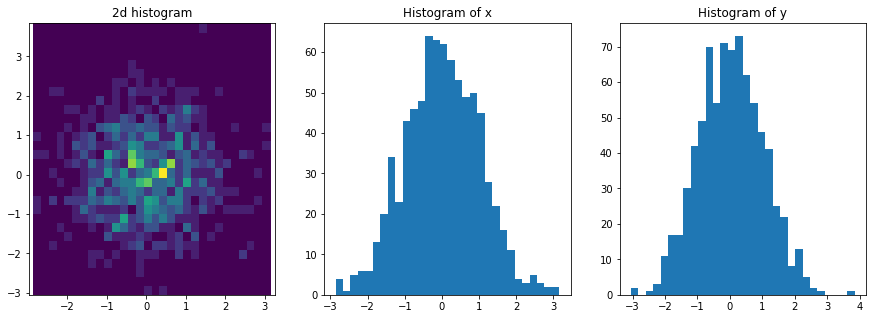

In [54]:
cos = np.array([])
sin = np.array([])

for i in range(1000):
    u, v = 2 * np.random.rand(2,1) - 1
    s = u**2 + v**2
    if 0 < s <= 1:
        cos = np.append(cos, u)
        sin = np.append(sin, v)

s = cos**2 + sin**2
r = np.sqrt(-2 * np.log(s) / s)
x = cos * r
y = sin * r

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

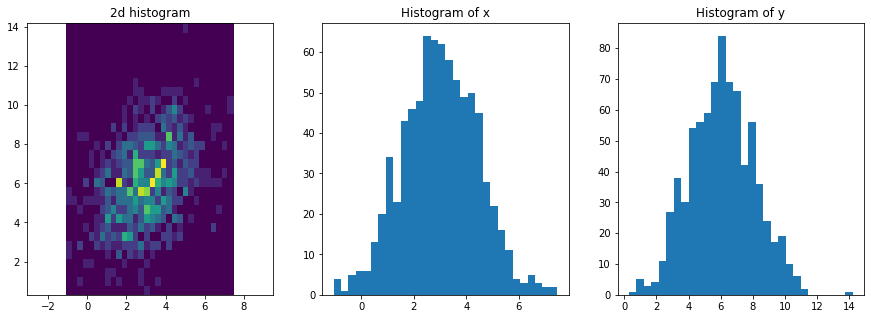

In [56]:
X = np.sqrt(2) * x + 3
Y = 1 / np.sqrt(2) * x + np.sqrt(7 / 2) * y + 6

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(X, Y, bins=30)
ax[0].axis('equal')
ax[1].hist(X, bins=30)
ax[2].hist(Y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

8: Перейдите от вектора из независимых стандартных нормальных величин к гауссовскому вектору с нулевым средним и заданной ниже ковариационно матрицей. Обоснуйте теоретически и численно, что полученный вектор обладает требуемой ковариационной матрицей.

In [57]:
B = np.array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
              [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
              [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
              [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
              [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
              [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
              [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
              [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
              [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])

Можем видеть, что матрица вырождена:

In [58]:
np.linalg.det(B)

0.0

Поэтому при применении метода Халецкого будем работать с матрицей 8 на 8

In [66]:
A = B[:8, :8]
np.linalg.det(A)

10125.000000000007

In [69]:
D = np.linalg.cholesky(A)
e = -(D[0:1] + D[4:5])
e

array([[-0.70710678, -0.        , -0.        , -0.        , -1.22474487,
        -0.        , -0.        , -0.        ]])

Проверим полученный ответ

In [68]:
rezult1 = np.concatenate((D, e), axis=0)

row = np.zeros((9,1))
rezult2 = np.concatenate((rezult, row), axis=1)

E = np.eye(9)

np.dot(np.dot(rezult2, E), rezult2.T)

array([[ 2.,  0.,  0.,  0., -1.,  0.,  0.,  0., -1.],
       [ 0.,  4.,  0., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  4.,  0.,  0.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  4.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  0.,  0.,  0.,  2.,  0.,  0.,  0., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  4.,  0., -1.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  4.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  0.,  4.,  0.],
       [-1.,  0.,  0.,  0., -1.,  0.,  0.,  0.,  2.]])

10: Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

In [85]:
def Generation(n):
    q = 0
    for k in range(1, 101):
        q += (k)**n / np.math.factorial(k)
    q *= 1 / np.exp(1)
    w = np.array([(k)**n / (q * np.math.factorial(k) * np.exp(1)) for k in range(100)])
    
    mass1 = np.cumsum(w)
    e = np.random.rand()
    
    summ = 0
    while 1:
        if e < mass1[summ]:
            e = summ + 1
            break;
        else:
            summ += 1
    w = np.array([1 / e for i in range(e)])
    
    mass1 = np.cumsum(w)
    mass2 = np.array([rng() for i in range(n)])
    list1 = []
    
    for i in range(n):
        summ = 0
        while summ != -1:
            if mass1[summ] > mass2[i]:
                list1.append(summ)
                summ =- 1
            else:
                summ += 1
    return list1

In [86]:
E = 0
for i in range(1000):
    E += len(np.unique(Generation(100)))
rez = E / 1000
rez

29.544